Naive Bayes titles only

Imports

In [1]:
#imports
import os
import utility
import matplotlib.pyplot as plt

Preprocess data and obtain train-test split

In [2]:
#use train set size of 80 percent of the total dataset
TRAIN_SIZE = 80

#get the dataset using only the title column
dataset = utility.GET_DATASET(["title"])

#preprocess the dataset
preprocessed_data = utility.PREPROCESS([dataset[i][0] for i in range(len(dataset))],lowercase=False)

#extract vocabulary
vocabulary = utility.GET_VOCABULARY(preprocessed_data)

#train test split
traintest_data = [[preprocessed_data[i],dataset[i][1]] for i in range(len(dataset))]
X_train, X_test, y_train, y_test = utility.TRAIN_TEST_SPLIT(traintest_data,TRAIN_SIZE,len(dataset))

Train Naive Bayes

In [3]:
#initialize lists for making ROC curve
ROC_curve_NB = [[0],[0]]
ROC_curve_LR = [[0],[0]]
ROC_curve_LR_ext = [[],[]]

#train Naive Bayes
model = utility.TRAINER(X_train,y_train,vocabulary,0,batch_size=128)

Test Naive Bayes and display metrics

In [4]:
#test Naive Bayes
predictions = utility.TESTER(X_test, model, vocabulary,batch_size=128)

#compute metrics from testing
metrics = utility.EVALUATE(predictions, y_test)
#complete items needed for ROC curve
ROC_curve_NB[0].append(metrics[0]/(metrics[0]+metrics[3]))
ROC_curve_NB[1].append(metrics[2]/(metrics[2]+metrics[1]))
ROC_curve_NB[0].append(1)
ROC_curve_NB[1].append(1)

#print out metrics
print("Naive Bayes metrics using only titles")
print("Test results / metrics:")
print("Number of true positives: "+str(metrics[0]))
print("Number of true negatives: "+str(metrics[1]))
print("Number of false positives: "+str(metrics[2]))
print("Number of false negatives: "+str(metrics[3]))
print("Sensitivity (recall): "+str(metrics[4]))
print("Specificity: "+str(metrics[5]))
print("Precision: "+str(metrics[6]))
print("Negative predictive value: "+str(metrics[7]))
print("Accuracy: "+str(metrics[8]))
print("F-score: "+str(metrics[9]))      

Naive Bayes metrics using only titles
Test results / metrics:
Number of true positives: 4615
Number of true negatives: 4334
Number of false positives: 3
Number of false negatives: 28
Sensitivity (recall): 0.9939694163256515
Specificity: 0.9993082776112521
Precision: 0.9993503681247293
Negative predictive value: 0.9935809261806511
Accuracy: 0.9965478841870824
F-score: 0.9966526293056905


Plot ROC curve

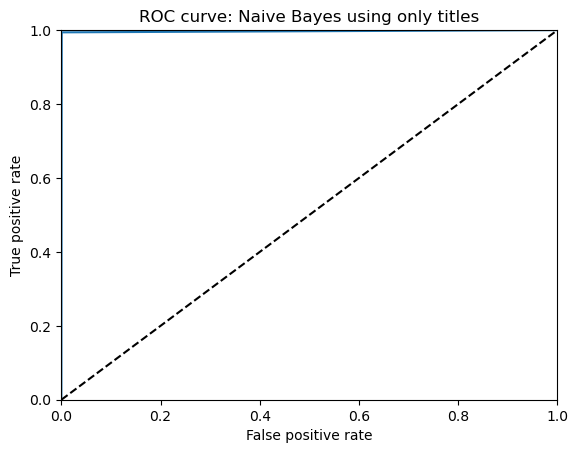

<Figure size 640x480 with 0 Axes>

In [5]:
#ROC curve
plt.plot(ROC_curve_NB[1],ROC_curve_NB[0])
plt.plot([0,1], [0,1], linestyle='dashed', color='black')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("ROC curve: Naive Bayes using only titles")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()
plt.clf()